In [1]:
# -*- coding: utf-8 -*-


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 



############################################################
########  第一部分，数据准备
###########################################################

#read the human gene data
filename_data = 'data.csv'
df= pd.read_csv(filename_data)
df_feature = df[(df.columns)[1:]]

#read the human gene data label
filename_label = 'labels.csv'
df_label = pd.read_csv(filename_label)



from collections import Counter
count = Counter(df_label['Class'])
print(count) 


#spilt the data into training set and test set
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(df_feature, df_label['Class_num'],test_size = 0.2)


#定义一个分类器空白模型，统计准确率，消耗时间
def test_algo(model,feature_train, label_train):

    #sti time cosumed
    import time
    starttime = time.time()

    # into machine learning process
    model.fit(feature_train, label_train)
    #make prediction of the gene dataset 
    label_prediction = model.predict(feature_test)
    labels_delta = label_test - label_prediction


    endtime = time.time()
    time_cosumed = endtime - starttime
    print ('time cosumed' + ' ' + str(time_cosumed))

    from collections import Counter           
    count = Counter(labels_delta)
    bingo = count[0]

    accuracy = bingo / len(label_test)
    print('accuracy' + '=' + str(accuracy))
    
    
    return accuracy,time_cosumed


from sklearn.svm import SVC
model = SVC(kernel='sigmoid')
accuracy_ori, time_ori = test_algo(model,feature_train, label_train)



from sklearn.decomposition import PCA 

n_components=50
pca = PCA(n_components)  
pca.fit(df_feature)  
df_pca = pca.fit_transform(df_feature)

#1，求协方差矩阵（去中心）
#2，求特征值和特征向量
#3,用原始数据沿着特征值向量进行投影


print(pca.explained_variance_ratio_)   
print(sum(pca.explained_variance_ratio_))

plt.figure()
plt.bar(range(n_components),pca.explained_variance_ratio_)
plt.title('info gain')
plt.ylim([0,0.15])
plt.show()


Counter({'BRCA': 300, 'KIRC': 146, 'LUAD': 141, 'PRAD': 136, 'COAD': 78})


c:\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


time cosumed 16.315751314163208
accuracy=0.37888198757763975


PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

[0.1583855  0.1050396  0.09472221 0.06500803 0.03615618 0.02972667
 0.02657142 0.01562731 0.01407073 0.01226873 0.0096011  0.00890219
 0.00758206 0.00723021 0.00664002 0.00637713 0.00569485 0.00517577
 0.00462121 0.00445512 0.00443458 0.00406434 0.0039547  0.00373192
 0.00368555 0.00355681 0.00348484 0.00316717 0.00310373 0.00295228
 0.00289203 0.0027628  0.00273073 0.00262029 0.00251351 0.00251004
 0.00240542 0.00235252 0.00231868 0.0022485  0.00221512 0.00217085
 0.00210761 0.00209361 0.00207503 0.00202509 0.00195889 0.001951
 0.00191054 0.00185842]
0.7057126732390311


<Figure size 640x480 with 0 Axes>

<BarContainer object of 50 artists>

Text(0.5, 1.0, 'info gain')

(0, 0.15)

<Figure size 640x480 with 1 Axes>

time cosumed 0.007776737213134766
accuracy=0.8633540372670807


c:\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<Figure size 432x288 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'accuracy')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'time consumed')

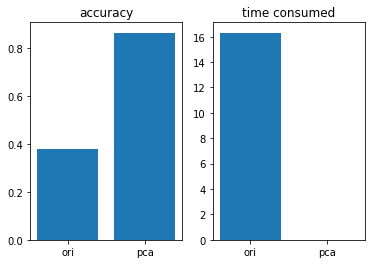

In [2]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(df_pca, df_label['Class_num'],test_size = 0.2)


model = SVC(kernel='sigmoid')
accuracy_pca, time_pac = test_algo(model,feature_train, label_train)

plt.figure()
plt.subplot(121)
plt.bar(['ori','pca'],[accuracy_ori,accuracy_pca])
plt.title('accuracy')

plt.subplot(122)
plt.bar(['ori','pca'],[time_ori,time_pac])
plt.title('time consumed')
plt.show()